<a href="https://colab.research.google.com/github/EsmahanDidinir/Apple-Stock-Prediction-LSTM/blob/main/Stock_prediction(LSTM).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow import keras

df = yf.download('AAPL', start='2015-01-01', end='2025-12-31')
print(df.head())

/tmp/ipython-input-1784488003.py:8: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download('AAPL', start='2015-01-01', end='2025-12-31')
[*********************100%***********************]  1 of 1 completed

Price           Close       High        Low       Open     Volume
Ticker           AAPL       AAPL       AAPL       AAPL       AAPL
Date                                                             
2015-01-02  24.237553  24.705322  23.798602  24.694237  212818400
2015-01-05  23.554741  24.086801  23.368521  24.006992  257142000
2015-01-06  23.556965  23.816344  23.195606  23.619038  263188400
2015-01-07  23.887278  23.987038  23.654501  23.765347  160423600
2015-01-08  24.805077  24.862717  24.097880  24.215378  237458000


In [2]:
df

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2015-01-02,24.237553,24.705322,23.798602,24.694237,212818400
2015-01-05,23.554741,24.086801,23.368521,24.006992,257142000
2015-01-06,23.556965,23.816344,23.195606,23.619038,263188400
2015-01-07,23.887278,23.987038,23.654501,23.765347,160423600
2015-01-08,24.805077,24.862717,24.097880,24.215378,237458000
...,...,...,...,...,...
2025-12-23,272.359985,272.500000,269.559998,270.839996,29642000
2025-12-24,273.809998,275.429993,272.200012,272.339996,17910600


In [3]:
df = df.reset_index()
df.columns = df.columns.get_level_values(0)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2765 entries, 0 to 2764
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    2765 non-null   datetime64[ns]
 1   Close   2765 non-null   float64       
 2   High    2765 non-null   float64       
 3   Low     2765 non-null   float64       
 4   Open    2765 non-null   float64       
 5   Volume  2765 non-null   int64         
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 129.7 KB


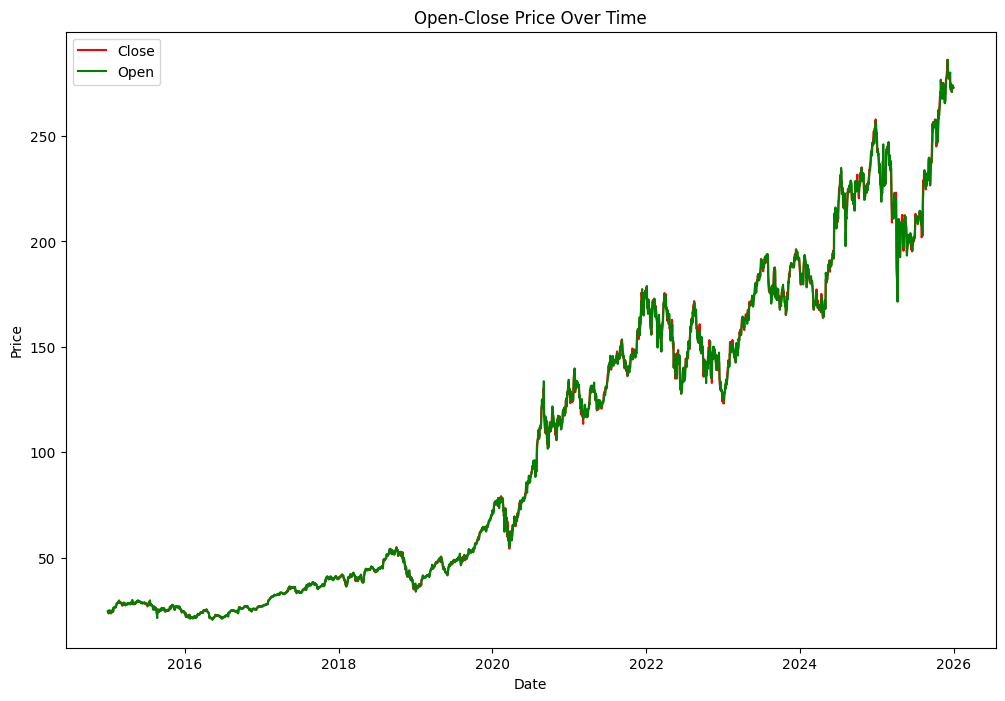

In [4]:
plt.figure(figsize=(12,8))
plt.plot(df['Date'],df['Close'],label = "Close",color ="red")
plt.plot(df['Date'],df['Open'],label = "Open",color ="green")
plt.title("Open-Close Price Over Time") # Parantez kullanıldı
plt.xlabel("Date")
plt.ylabel("Price")

plt.legend()
plt.show()



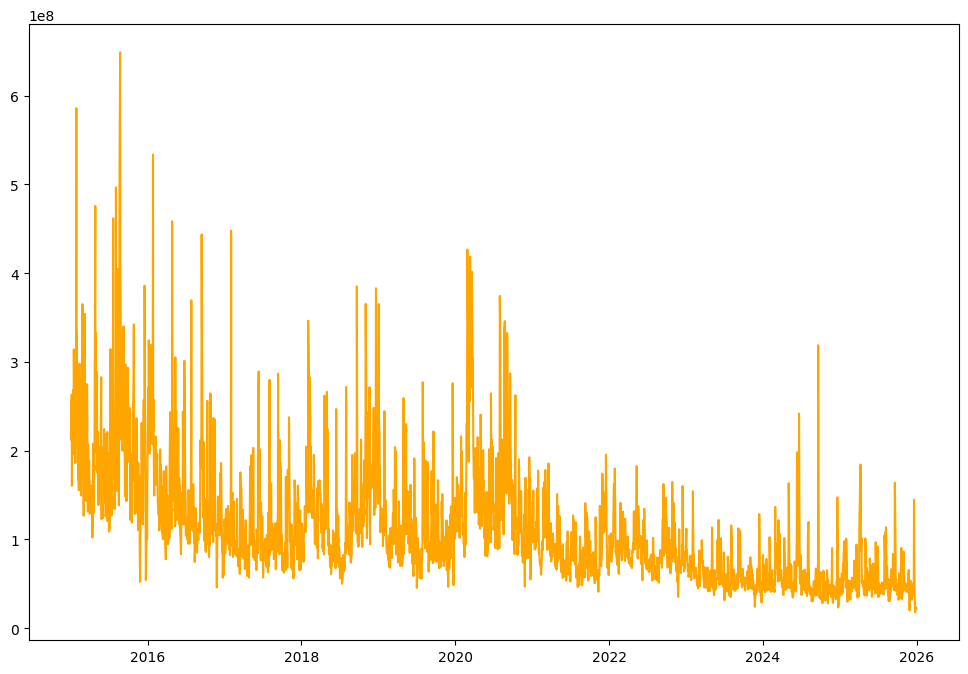

In [5]:
plt.figure(figsize=(12,8))
plt.plot(df["Date"],df["Volume"],label="Volume",color="orange")
plt.title="Stock-Volume over time"
plt.show()

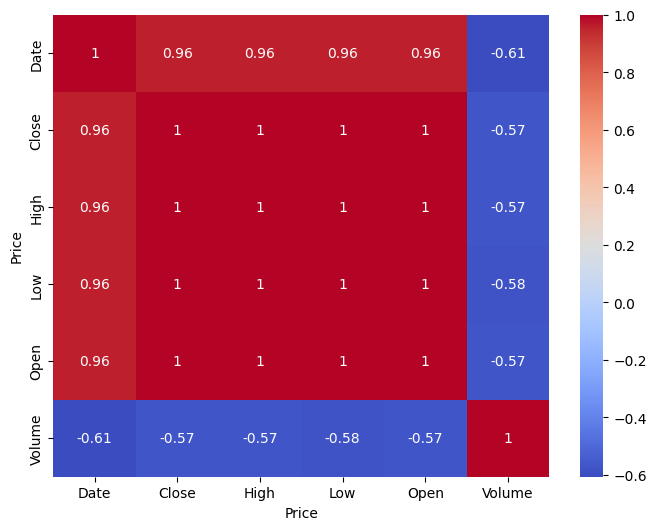

In [6]:
import seaborn as sns
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title="Feature Correlation Heatmap"
plt.show()

In [7]:
stock_close=df.filter(["Close"])
dataset=stock_close.values
training_data_len=int(np.ceil(len(dataset)*0.90))
training_data_len
stock_close

,Close
0,24.237553
1,23.554741
2,23.556965
3,23.887278
4,24.805077
...,...
2760,272.359985
2761,273.809998
2762,273.399994
2763,273.760010


In [8]:
train_df=df[:training_data_len]
print(train_df)

Price       Date       Close        High         Low        Open     Volume
0     2015-01-02   24.237553   24.705322   23.798602   24.694237  212818400
1     2015-01-05   23.554741   24.086801   23.368521   24.006992  257142000
2     2015-01-06   23.556965   23.816344   23.195606   23.619038  263188400
3     2015-01-07   23.887278   23.987038   23.654501   23.765347  160423600
4     2015-01-08   24.805077   24.862717   24.097880   24.215378  237458000
...          ...         ...         ...         ...         ...        ...
2484  2024-11-14  227.192459  227.839526  223.986956  224.006870   44923900
2485  2024-11-15  223.986969  225.898323  223.260260  225.380660   47923700
2486  2024-11-18  226.993378  228.705635  224.156203  224.235845   44633700
2487  2024-11-19  227.252197  229.123738  225.639496  225.958047   36211800
2488  2024-11-20  227.968948  228.894754  224.872950  227.033178   35169600

[2489 rows x 6 columns]


In [9]:
test_df = df[training_data_len:].copy()
print(test_df.head())

Price       Date       Close        High         Low        Open    Volume
2489  2024-11-21  227.491119  229.123735  224.693774  227.849499  42108300
2490  2024-11-22  228.835022  229.681201  227.033174  227.033174  38168300
2491  2024-11-25  231.821518  232.199812  228.705621  230.417878  90152800
2492  2024-11-26  234.001678  234.509392  232.279472  232.279472  45986200
2493  2024-11-27  233.872238  234.628826  232.757286  233.414318  33498400


In [10]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data=scaler.fit_transform(dataset)
training_data=scaled_data[:training_data_len]
training_data

array([[0.01368099],
       [0.01111003],
       [0.0111184 ],
       ...,
       [0.77710933],
       [0.77808386],
       [0.78078261]])

In [17]:
X_train , Y_train = [],[]
for i in range(90,len(training_data)):
  X_train.append(training_data[i-90:i,0])
  Y_train.append(training_data[i,0])
X_train , Y_train = np.array(X_train),np.array(Y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))



In [23]:
test_data=scaled_data[training_data_len-90:]
X_test , Y_test = [],dataset[training_data_len:]
for i in range(90,len(test_data)):
  X_test.append(test_data[i-90:i,0])

X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1 ))


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_6 (LSTM)                   │ (None, 90, 64)         │        16,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_7 (LSTM)                   │ (None, 64)             │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 58,369 (228.00 KB)

 Trainable params: 58,369 (228.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
150/150 ━━━━━━━━━━━━━━━━━━━━ 14s 69ms/step - loss: 0.0200 - root_mean_squared_error: 0.1319
Epoch 2/30
150/150 ━━━━━━━━━━━━━━━━━━━━ 20s 69ms/step - loss: 0.0039 - root_mean_squared_error: 0.0623
Epoch 3/30
150/150 ━━━━━━━━━━━━━━━━━━━━ 10s 65ms/step - loss: 0.0031 - root_mean_squared_error: 0.0559
Epoch 4/30
150/150 ━━━━━━━━━━━━━━━━━━━━ 10s 64ms/step - loss: 0.0027 - root_mean_squared_error: 0.0516
Epoch 5/30
150/150 ━━━━━━━━━━━━━━━━━━━━ 10s 69ms/step - loss: 0.0027 - root_mean_squared_error: 0.0519
Epoch 6/30
150/150 ━━━━━━━━━━━━━━━━━━━━ 11s 74ms/step - loss: 0.0024 - root_mean_squared_error: 0.0482
Epoch 7/30
150/150 ━━━━━━━━━━━━━━━━━━━━ 10s 69ms/step - loss: 0.0023 - root_mean_squared_error: 0.0480
Epoch 8/30
150/150 ━━━━━━━━━━━━━━━━━━━━ 10s 69ms/step - loss: 0.0021 - root_mean_squared_error: 0.0462
Epoch 9/30
150/150 ━━━━━━━━━━━━━━━━━━━━ 10s 64ms/step - loss: 0.0019 - root_mean_squared_error: 0.0437
Epoch 10/30
150/150 ━━━━━━━━━━━━━━━━━━━━ 10s 67ms/step - loss: 0.0020 - r

TypeError: 'str' object is not callable

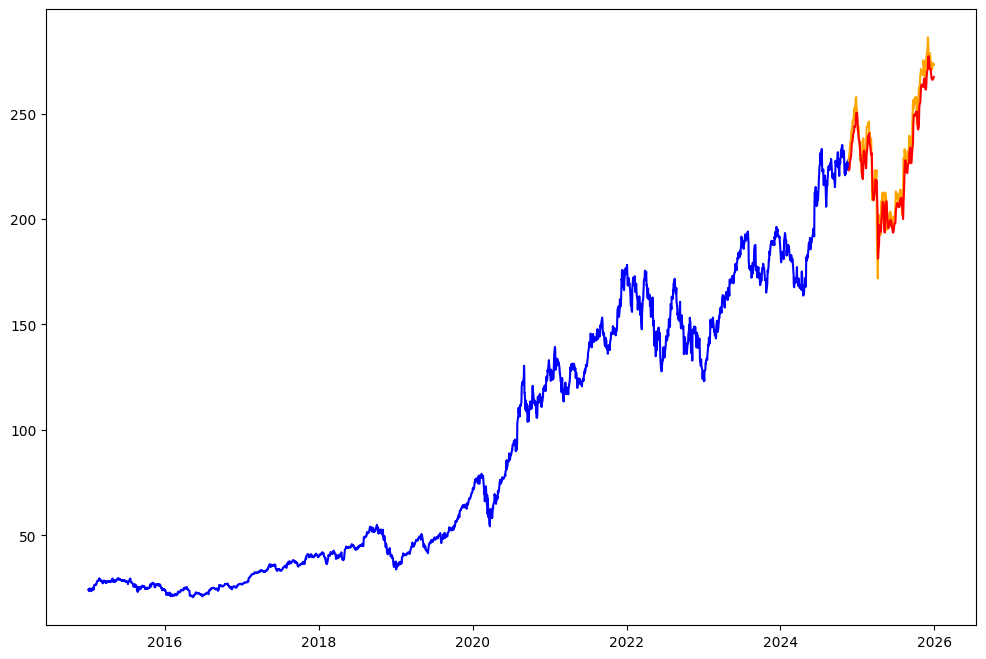

In [28]:
model=keras.models.Sequential()
model.add(keras.layers.LSTM(64,return_sequences=True,input_shape=(X_train.shape[1],1)))
model.add(keras.layers.LSTM(64,return_sequences=False))
model.add(keras.layers.Dense(128, activation="relu"))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(1))
model.summary()
model.compile(optimizer="adam",
              loss="mean_squared_error",
              metrics=[keras.metrics.RootMeanSquaredError()])


training = model.fit(X_train, Y_train, epochs=30, batch_size=16)

predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)


train = df[:training_data_len]
test =  df[training_data_len:]

test = test.copy()

test['Predictions'] = predictions

plt.figure(figsize=(12,8))
plt.plot(train['Date'], train['Close'], label="Train (Actual)", color='blue')
plt.plot(test['Date'], test['Close'], label="Test (Actual)", color='orange')
plt.plot(test['Date'], test['Predictions'], label="Predictions", color='red')
plt.title("Our Stock Predictions")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.legend()
plt.show()
